In [137]:
import pandas as pd 

df = pd.read_csv('/project/c_gnn_001/code/tsp/atsp_gnn/jobs/best_final_output_table.csv')
df2 = pd.read_csv('/project/c_gnn_001/code/tsp/atsp_gnn/jobs/all_final_output_table.csv')
df = df.drop('model_file', axis=1)
df3 = df2.copy()
desired_cols = [
    'atsp_size',
    'relations',
    'agg',
    'Avg Gap GNN (%)',
    'Avg Gap 2-Opt (%)',
    'Avg Gap 3-Opt (%)',
    'iterations',
    'GNN Time (s)',
    'Edge Builder + 2-Opt Time (s)',
    'Edge Builder + 3-Opt Time (s)',
    'Total Time 2-Opt (s)',
    'Total Time 3-Opt (s)',
    'Avg Opt Cost (M)',
]

missing = [c for c in desired_cols if c not in df2.columns]
if missing:
    raise ValueError(f"Missing columns in df2: {missing}")

df2 = df2[desired_cols]
df2[df2.select_dtypes(include='float').columns] = df2.select_dtypes(include='float').round(2)

priority = [
    'atsp_size', 'relations', 'agg',
    'Avg Gap GNN (%)', 'Avg Gap 2-Opt (%)', 'Avg Gap 3-Opt (%)'
]

ordered = [c for c in priority if c in df.columns] + [c for c in df.columns if c not in priority]
df = df[ordered]
print(df.columns)
ordered = [c for c in priority if c in df2.columns] + [c for c in df2.columns if c not in priority]
df2 = df2[ordered]
print(df2.columns)
print(df[df['GNN Time (s)'] == 0.0].sum(numeric_only=True))
print(df2[df2['GNN Time (s)'] == 0.0].sum(numeric_only=True))


Index(['atsp_size', 'relations', 'agg', 'Avg Gap GNN (%)', 'Avg Gap 2-Opt (%)',
       'Avg Gap 3-Opt (%)', 'iterations', 'GNN Time (s)',
       'Edge Builder + 2-Opt Time (s)', 'Edge Builder + 3-Opt Time (s)',
       'Total Time 2-Opt (s)', 'Total Time 3-Opt (s)', 'Avg Opt Cost (M)'],
      dtype='object')
Index(['atsp_size', 'relations', 'agg', 'Avg Gap GNN (%)', 'Avg Gap 2-Opt (%)',
       'Avg Gap 3-Opt (%)', 'iterations', 'GNN Time (s)',
       'Edge Builder + 2-Opt Time (s)', 'Edge Builder + 3-Opt Time (s)',
       'Total Time 2-Opt (s)', 'Total Time 3-Opt (s)', 'Avg Opt Cost (M)'],
      dtype='object')
atsp_size                        0.0
Avg Gap GNN (%)                  0.0
Avg Gap 2-Opt (%)                0.0
Avg Gap 3-Opt (%)                0.0
iterations                       0.0
GNN Time (s)                     0.0
Edge Builder + 2-Opt Time (s)    0.0
Edge Builder + 3-Opt Time (s)    0.0
Total Time 2-Opt (s)             0.0
Total Time 3-Opt (s)             0.0
Avg Opt Cost

In [133]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 20)

# Find top 3 best for each group
top_3_per_group = (df.sort_values(['atsp_size', 'Avg Gap 3-Opt (%)'])
                   .groupby('atsp_size', group_keys=False)
                   .head(3)
                   .reset_index(drop=True))

print(top_3_per_group.to_string(index=False))


 atsp_size   relations    agg  Avg Gap GNN (%)  Avg Gap 2-Opt (%)  Avg Gap 3-Opt (%)  iterations  GNN Time (s)  Edge Builder + 2-Opt Time (s)  Edge Builder + 3-Opt Time (s)  Total Time 2-Opt (s)  Total Time 3-Opt (s)  Avg Opt Cost (M)
       100       ss_tt concat            13.27               9.97               2.31           9          0.39                           2.70                           5.18                  3.09                  5.57               0.0
       100    pp_ss_tt    sum            13.70              10.14               2.43           9          0.44                           2.63                           5.52                  3.07                  5.96               0.0
       100 pp_ss_st_tt concat            12.84               9.39               2.46           9          0.65                           2.67                           5.26                  3.32                  5.91               0.0
       150 pp_ss_st_tt   attn            15.30              

In [134]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 20)

# Find top 3 best for each group
top_3_per_group = (df2.sort_values(['atsp_size', 'Avg Gap 3-Opt (%)'])
                   .groupby('atsp_size', group_keys=False)
                   .head(3)
                   .reset_index(drop=True))

print(top_3_per_group.to_string(index=False))
print(top_3_per_group.value_counts(['relations', 'agg']).sort_values(ascending=False).head(1))



 atsp_size   relations    agg  Avg Gap GNN (%)  Avg Gap 2-Opt (%)  Avg Gap 3-Opt (%)  iterations  GNN Time (s)  Edge Builder + 2-Opt Time (s)  Edge Builder + 3-Opt Time (s)  Total Time 2-Opt (s)  Total Time 3-Opt (s)  Avg Opt Cost (M)
       100       ss_tt concat            13.27               9.97               2.31           9          0.39                           2.70                           5.18                  3.09                  5.57              1.56
       100    pp_ss_tt    sum            13.70              10.14               2.43           9          0.44                           2.63                           5.52                  3.07                  5.96              1.56
       100       ss_tt concat            13.27               9.97               2.44           6          0.39                           2.70                           3.56                  3.09                  3.96              1.56
       150 pp_ss_st_tt   attn            15.30              

In [135]:
time_caps = {100: 3.23, 150: 4.24, 250: 8.48, 500: 17.06}

eligible = df2[
    df2['Total Time 3-Opt (s)'] <= df2['atsp_size'].map(time_caps).fillna(float('inf'))
]

top3 = (
    eligible.sort_values(['atsp_size', 'Avg Gap 3-Opt (%)'])
            .groupby('atsp_size', group_keys=False)
            .head(3)
)

print(top3.to_string(index=False))
print(top3.value_counts(['relations', 'agg']).sort_values(ascending=False).head(1))



 atsp_size   relations    agg  Avg Gap GNN (%)  Avg Gap 2-Opt (%)  Avg Gap 3-Opt (%)  iterations  GNN Time (s)  Edge Builder + 2-Opt Time (s)  Edge Builder + 3-Opt Time (s)  Total Time 2-Opt (s)  Total Time 3-Opt (s)  Avg Opt Cost (M)
       100 pp_ss_st_tt concat            12.84               9.39               2.84           3          0.65                           2.67                           1.70                  3.32                  2.35              1.56
       100       ss_tt concat            13.27               9.97               2.87           3          0.39                           2.70                           1.73                  3.09                  2.12              1.56
       100    pp_ss_tt    sum            13.70              10.14               2.90           3          0.44                           2.63                           1.84                  3.07                  2.28              1.56
       150 pp_ss_st_tt   attn            15.30              

In [136]:
subset = df2[
    (df2['relations'] == 'pp_ss_st_tt') &
    (df2['atsp_size'] == 100) &
    (df2['agg'].isin(['concat', 'attn']))
]

idx = subset.groupby('agg')['Avg Gap 3-Opt (%)'].idxmin()
print("row indices in df2:", idx.tolist())

print(df3.loc[idx].to_string(index=True))


row indices in df2: [36, 40]
    atsp_size    relations     agg  Avg Gap GNN (%)  Avg Gap 2-Opt (%)  Avg Gap 3-Opt (%)  iterations                            model_file  slurm_dir framework     model  GNN Time (s)  Edge Builder + 2-Opt Time (s)  Edge Builder + 3-Opt Time (s)  Total Time 2-Opt (s)  Total Time 3-Opt (s)  combined_total_time_s  Avg Opt Cost (M)  model_param_count  hidden_dim  num_heads  num_gnn_layers    three_opt_source
36        100  pp_ss_st_tt    attn        16.073753          10.861721              3.058           9    best_model_rel_pp_ss_st_tt_attn.pt   12201357       dgl  HetroGAT          0.58                       2.651514                          5.829              3.231514                 6.409                  5.829          1.561316               5225          16          2               3  slurm-12237679.out
40        100  pp_ss_st_tt  concat        12.838508           9.393829              2.457           9  best_model_rel_pp_ss_st_tt_concat.pt   12201358 

Top 3 configs per size (sorted by Avg Gap 3-Opt (%) with time tie-breaker):


,ATSP,rel,agg,iter,GNN gap (%),2-Opt gap (%),3-Opt gap (%),3-Opt time (s),2-Opt time (s)
0,100,ss_tt,concat,9,13.27,9.97,2.31,5.57 (5.18),3.09 (2.70)
1,100,pp_ss_tt,sum,9,13.70,10.14,2.43,5.96 (5.52),3.07 (2.63)
2,100,pp_ss_st_tt,concat,9,12.84,9.39,2.46,5.91 (5.26),3.32 (2.67)
3,150,pp_ss_st_tt,attn,2,15.30,12.08,3.82,5.41 (4.58),4.66 (3.83)
4,150,pp_ss_st_tt,concat,2,13.26,10.84,4.14,4.76 (4.11),4.44 (3.79)
5,150,ss_tt,concat,2,14.73,11.69,4.19,4.79 (4.22),4.41 (3.84)
6,250,pp_ss_st_tt,attn,1,16.04,14.29,5.34,13.39 (11.00),8.26 (5.87)
7,250,pp_ss_tt,sum,1,15.31,13.63,5.58,12.96 (10.47),8.47 (5.98)
8,250,pp_ss_st_tt,concat,1,14.97,13.49,5.65,10.74 (10.08),6.63 (5.97)
9,500,pp_ss_st_tt,attn,1,16.94,16.25,7.63,29.76 (6.84),37.17 (14.25)


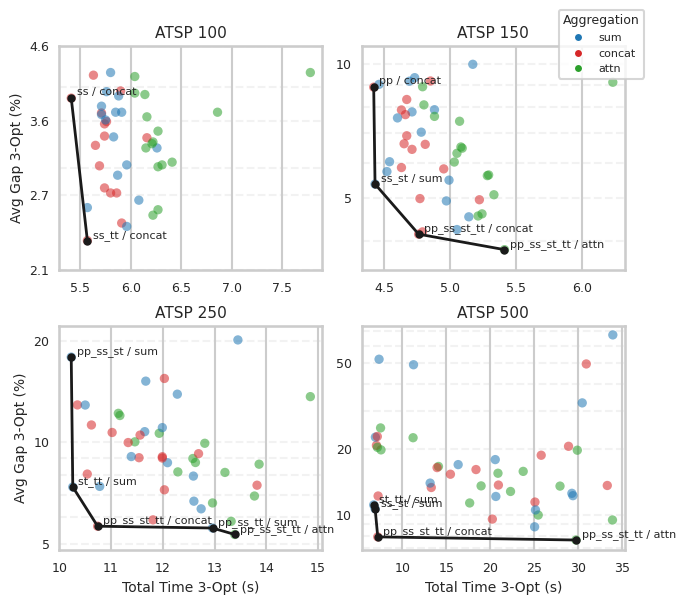

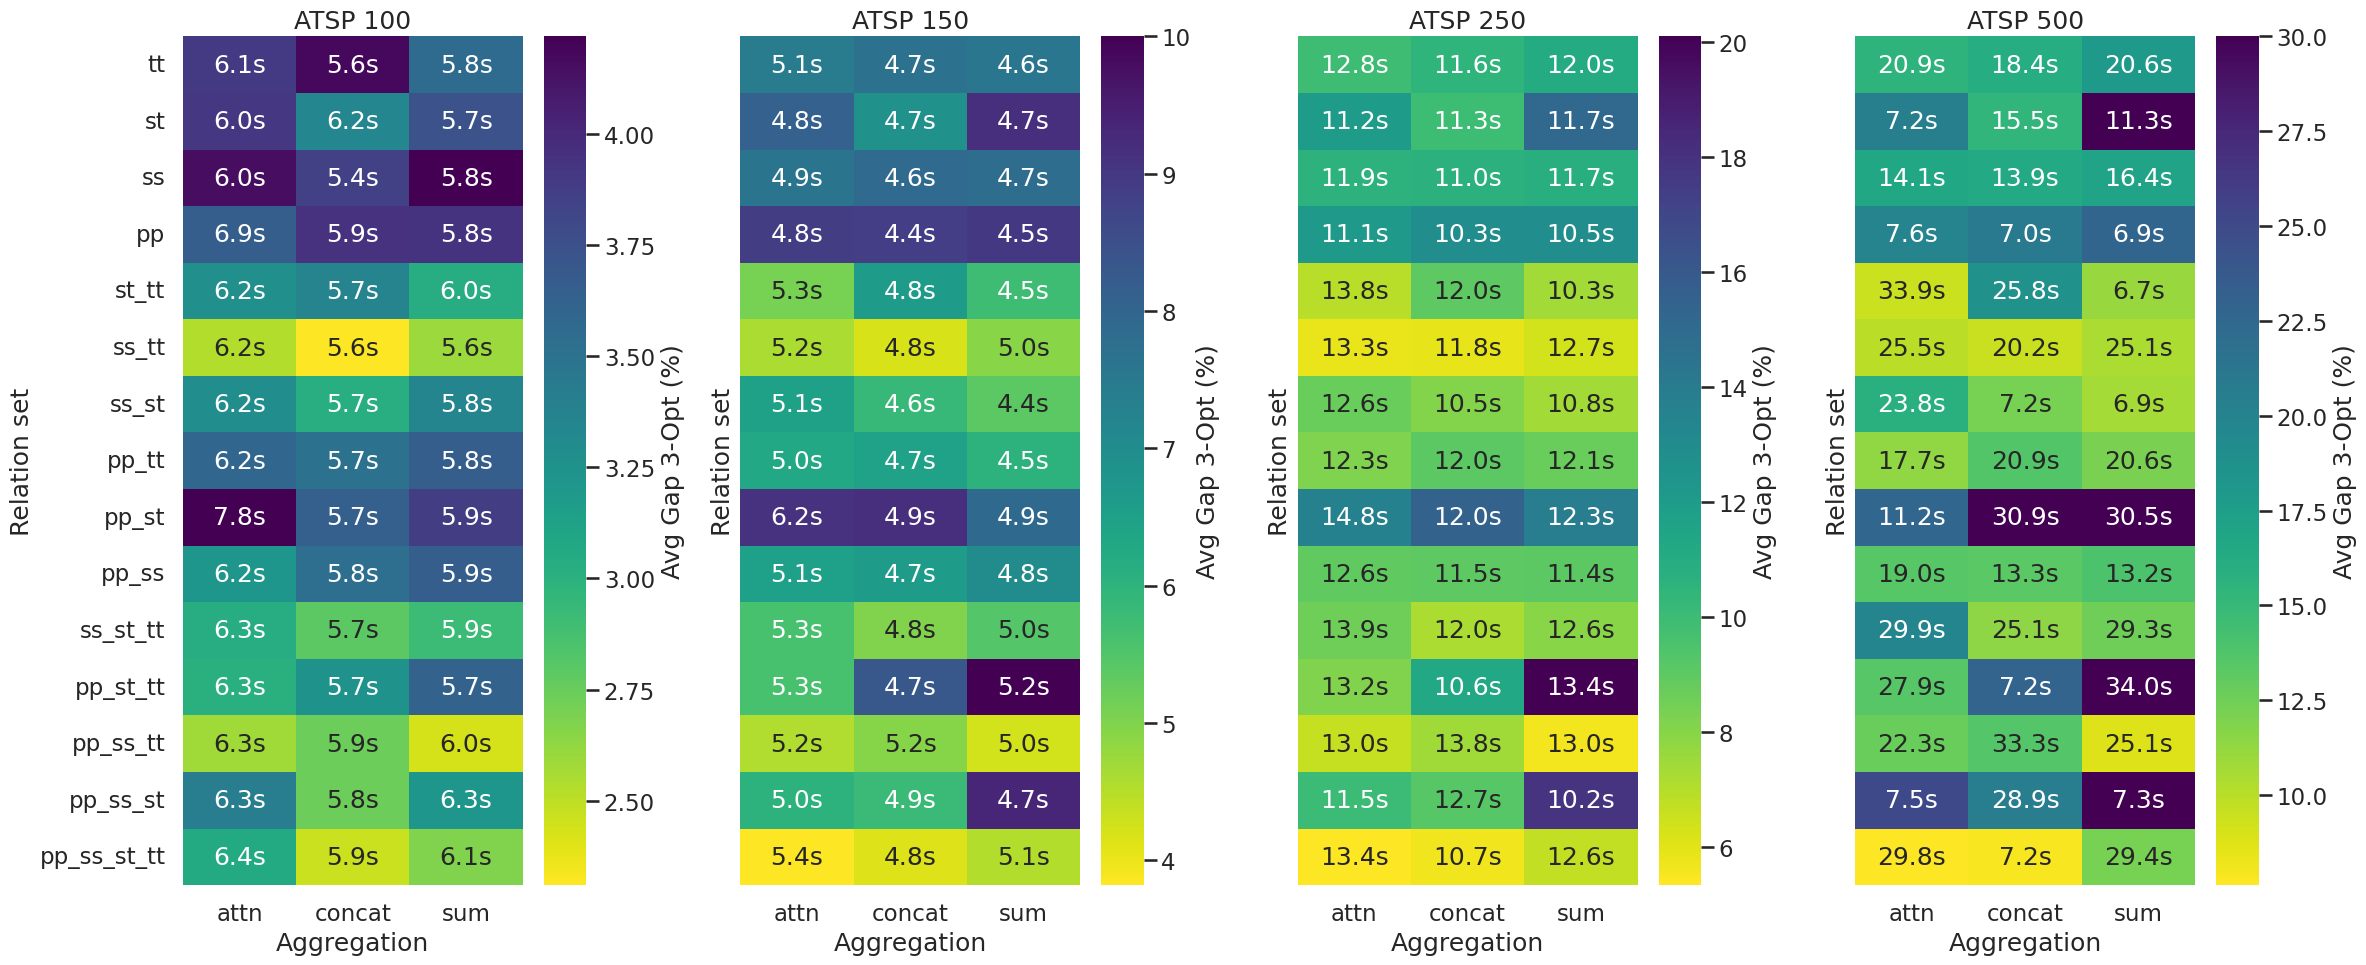

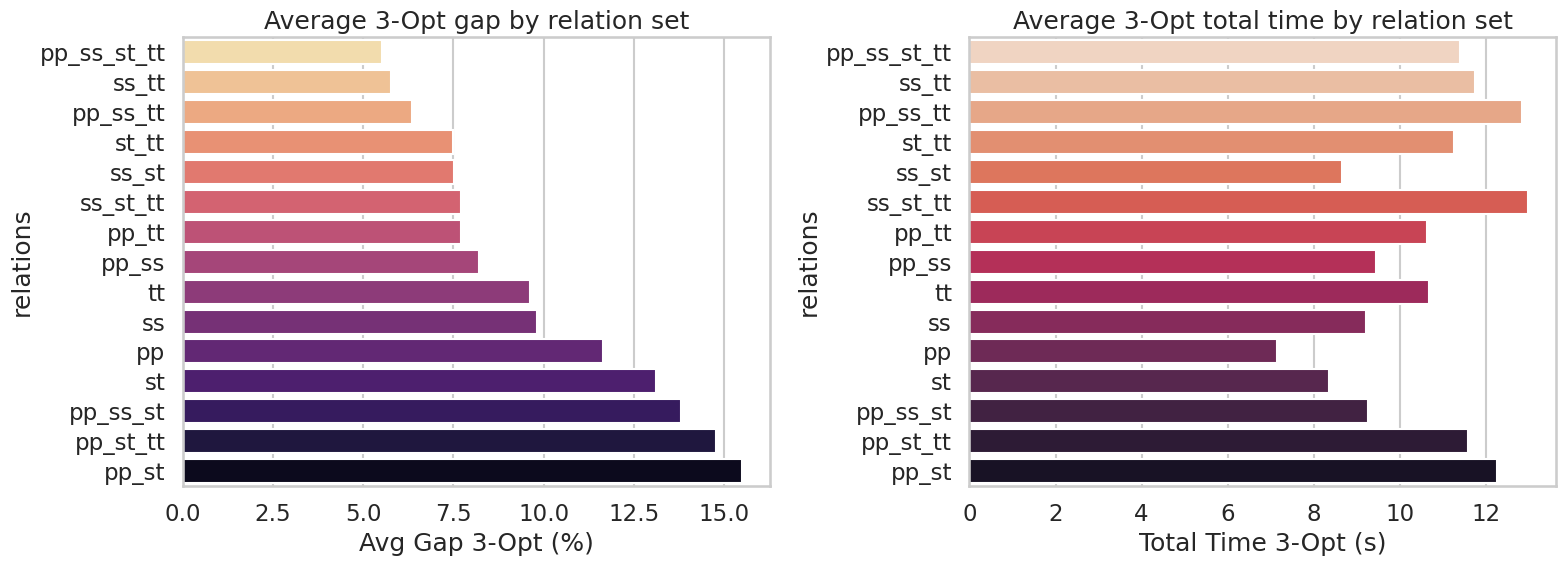

In [211]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.ticker import FuncFormatter

time_col = "Total Time 3-Opt (s)"
gap_col  = "Avg Gap 3-Opt (%)"
sizes    = sorted(df["atsp_size"].unique())
assert len(sizes) == 4, "Expecting exactly 4 ATSP sizes for a 2x2 layout."

rows, cols = 2, 2
fig, axes = plt.subplots(rows, cols, figsize=(6.5, 6), sharex=False, sharey=False)
axes = axes.flatten()

agg_palette = {
    "sum": "#1f77b4",    # blue
    "concat": "#d62728", # red
    "attn": "#2ca02c",   # green
}
eps = 1e-6

def format_tick(value: float) -> str:
    if value >= 1:
        return f"{value:.1f}".rstrip("0").rstrip(".")
    if value >= 0.1:
        return f"{value:.2f}".rstrip("0").rstrip(".")
    return f"{value:.3f}".rstrip("0").rstrip(".")

for ax, size in zip(axes, sizes):
    subset = df[df["atsp_size"] == size].copy()
    subset["_plot_gap"] = subset[gap_col].clip(lower=eps)

    sns.scatterplot(
        data=subset,
        x=time_col,
        y="_plot_gap",
        hue="agg",
        palette=agg_palette,
        ax=ax,
        alpha=0.55,
        legend=False,
        s=45,
        edgecolor="none",
    )

    ranked = subset.sort_values(time_col).reset_index(drop=True)
    best_so_far = np.inf
    keep_idx = []
    for idx, row in ranked.iterrows():
        if row["_plot_gap"] <= best_so_far:
            best_so_far = row["_plot_gap"]
            keep_idx.append(idx)
    front = ranked.loc[keep_idx]

    ax.plot(front[time_col], front["_plot_gap"], color="k", lw=2, marker="o", markersize=5)
    for _, row in front.iterrows():
        ax.annotate(
            f"{row['relations']} / {row['agg']}",
            (row[time_col], row["_plot_gap"]),
            textcoords="offset points",
            xytext=(4, 2),
            fontsize=8,
        )

    min_gap = subset["_plot_gap"].min()
    max_gap = subset["_plot_gap"].max()
    lower = max(min_gap * 0.9, eps)
    upper = max_gap * 1.1

    ticks = []
    p_min = int(np.floor(np.log10(lower)))
    p_max = int(np.ceil(np.log10(upper)))
    for power in range(p_min, p_max + 1):
        for mantissa in (1, 2, 5):
            val = mantissa * 10**power
            if lower <= val <= upper:
                ticks.append(val)
    if not ticks:
        ticks = np.geomspace(lower, upper, num=4)

    ax.set_yscale("log")
    ax.set_ylim(lower, upper)
    ax.set_yticks(ticks)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: format_tick(y)))
    ax.yaxis.set_minor_formatter(FuncFormatter(lambda *_: ""))
    ax.yaxis.get_offset_text().set_visible(False)
    ax.yaxis.grid(True, which="both", ls="--", alpha=0.25)
    ax.tick_params(axis="y", pad=-2, labelsize=9)
    ax.tick_params(axis="x", pad=0, labelsize=9)

    ax.set_title(f"ATSP {size}", fontsize=11)

    # left column gets the ylabel (font size 10)
    if size in (sizes[0], sizes[2]):
        ax.set_ylabel(gap_col, fontsize=10)
        ax.yaxis.labelpad = 4
    else:
        ax.set_ylabel("")

    # bottom row gets the xlabel (font size 10)
    if size in (sizes[2], sizes[3]):
        ax.set_xlabel(time_col, fontsize=10)
    else:
        ax.set_xlabel("")

legend_handles = [
    Line2D([0], [0], marker="o", color="w", label=agg,
           markerfacecolor=agg_palette[agg], markersize=6)
    for agg in ("sum", "concat", "attn")
]

fig.legend(
    handles=legend_handles,
    labels=["sum", "concat", "attn"],
    title="Aggregation",
    title_fontsize=9,
    fontsize=8,
    loc="upper right",
    bbox_to_anchor=(0.98, 0.98),
    borderaxespad=0,
)

plt.subplots_adjust(left=0.08, right=0.95, top=0.92, bottom=0.08, wspace=0.15, hspace=0.25)
fig.savefig("../../jobs/plots/pareto_summary.pdf", dpi=300, bbox_inches="tight")
# plt.show()

ncols = len(sizes)  # add this line

# --- Heatmaps ----------------------------------------------------------------
atom_order = {"pp": 0, "ss": 1, "st": 2, "tt": 3}

def relation_sort_key(rel: str):
    parts = rel.split("_")
    normalized = tuple(sorted(parts, key=lambda p: atom_order.get(p, len(atom_order))))
    return (-len(parts), normalized)

ncols = len(sizes)
fig, axes = plt.subplots(1, ncols, figsize=(6 * ncols, 10), sharey=True)
if ncols == 1:
    axes = [axes]

for ax, size in zip(axes, sizes):
    sub = df[df["atsp_size"] == size].copy()
    pivot_gap = sub.pivot(index="relations", columns="agg", values=gap_col)
    pivot_time = sub.pivot(index="relations", columns="agg", values=time_col)

    ordered_relations = sorted(pivot_gap.index, key=relation_sort_key)
    ordered_relations = list(reversed(ordered_relations))  # now singles → pairs → triples → all
    pivot_gap = pivot_gap.loc[ordered_relations]
    pivot_time = pivot_time.loc[ordered_relations]

    vmin = pivot_gap.min().min()
    vmax = min(pivot_gap.max().max(), 30.0)

    sns.heatmap(
        pivot_gap,
        ax=ax,
        cmap="viridis_r",
        vmin=vmin,
        vmax=vmax,
        annot=pivot_time.map(lambda t: f"{t:.1f}s"),
        fmt="",
        cbar_kws={"label": gap_col},
    )
    ax.set_title(f"ATSP {size}")
    ax.set_xlabel("Aggregation")
    ax.set_ylabel("Relation set")

plt.tight_layout()
plt.savefig("../../jobs/plots/heatmap.pdf", dpi=300, bbox_inches="tight")
# plt.show()
# --- Detail tables & relation contributions ----------------------------------
k = 3
top_k = (
    df.sort_values(["atsp_size", gap_col, time_col])
      .groupby("atsp_size", group_keys=False)
      .head(k)
      .reset_index(drop=True)
)

pretty_top = (
    top_k
    .rename(columns={
        "atsp_size": "ATSP",
        "relations": "rel",
        "agg": "agg",
        "iterations": "iter",
        "Avg Gap GNN (%)": "GNN gap (%)",
        "Avg Gap 2-Opt (%)": "2-Opt gap (%)",
        "Avg Gap 3-Opt (%)": "3-Opt gap (%)"
    })
    .assign(**{
        "3-Opt time (s)": top_k.apply(
            lambda r: f"{r['Total Time 3-Opt (s)']:.2f} ({r['Edge Builder + 3-Opt Time (s)']:.2f})",
            axis=1,
        ),
        "2-Opt time (s)": top_k.apply(
            lambda r: f"{r['Total Time 2-Opt (s)']:.2f} ({r['Edge Builder + 2-Opt Time (s)']:.2f})",
            axis=1,
        ),
    })
    .loc[:, [
        "ATSP", "rel", "agg", "iter",
        "GNN gap (%)", "2-Opt gap (%)", "3-Opt gap (%)",
        "3-Opt time (s)", "2-Opt time (s)",
    ]]
)

print(f"Top {k} configs per size (sorted by {gap_col} with time tie-breaker):")
display(pretty_top)

rel_summary = (
    df.groupby("relations")[[gap_col, time_col]]
      .mean()
      .sort_values(gap_col)
      .reset_index()
)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(
    data=rel_summary,
    x=gap_col,
    y="relations",
    hue="relations",
    palette="magma_r",
    ax=ax[0],
    dodge=False,
    legend=False,
)
ax[0].set_title("Average 3-Opt gap by relation set")
ax[0].set_xlabel(gap_col)
ax[0].set_ylabel("relations")

sns.barplot(
    data=rel_summary,
    x=time_col,
    y="relations",
    hue="relations",
    palette="rocket_r",
    ax=ax[1],
    dodge=False,
    legend=False,
)
ax[1].set_title("Average 3-Opt total time by relation set")
ax[1].set_xlabel(time_col)
ax[1].set_ylabel("relations")

plt.tight_layout()
plt.savefig("../../jobs/plots/barplot.pdf", dpi=300, bbox_inches="tight")
